In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline as interp

In [2]:
#Import data
data_bg = pd.read_csv('data/no_PuBe_FullShielding_scan.csv')
data_raised = pd.read_csv('data/PuBe_raised_FullShielding_scanwindow.csv')
old_raised = pd.read_csv('../UniversalTrigger2/data/PuBe_raised_scan.csv')
partial_raised = pd.read_csv('data/PuBe_raised_scan.csv')
fixed_raised = pd.read_csv('data/PuBe_raised_FixedBoron_out.csv')

threshold = data_bg.iloc[:,0] #used same set of thresholds for all of them.

rate_bg = data_bg.iloc[:,1]
rate_raised = data_raised.iloc[:,1]
rate_or = old_raised.iloc[:,1]
rate_partial = partial_raised.iloc[:,1]
rate_fixed = fixed_raised.iloc[:,1]

del data_bg, data_raised, old_raised, partial_raised, fixed_raised

singlerates_bg = pd.read_csv('data/no_PuBe_FullShielding_rates.txt',comment="#")   #Use comment to ignore strange outliers.
singlerates_raised = pd.read_csv('data/PuBe_raised_FullShielding_rates.txt',comment="#")
singlerates_or = pd.read_csv('../UniversalTrigger2/data/PuBe_raised_rates.txt',comment="#")
singlerates_partial = pd.read_csv('data/PuBe_raised_rates.txt',comment="#")
singlerates_fixed = pd.read_csv('data/PuBe_raised_FixedBoron_rates.txt',comment="#")
singlerates_north = pd.read_csv('data/PuBe_northside_FixedBoron_rates.txt',comment="#")

col1_bg = singlerates_bg.iloc[:,0].to_numpy()
col2_bg = singlerates_bg.iloc[:,1].to_numpy()
col1_raised = singlerates_raised.iloc[:,0].to_numpy()
col2_raised = singlerates_raised.iloc[:,1].to_numpy()
col1_or = singlerates_or.iloc[:,0].to_numpy()
col2_or = singlerates_or.iloc[:,1].to_numpy()
col1_partial = singlerates_partial.iloc[:,0].to_numpy()
col2_partial = singlerates_partial.iloc[:,1].to_numpy()
col1_fixed = singlerates_fixed.iloc[:,0].to_numpy()
col2_fixed = singlerates_fixed.iloc[:,1].to_numpy()
col1_north = singlerates_north.iloc[:,0].to_numpy()
col2_north = singlerates_north.iloc[:,1].to_numpy()

avg_bg_1_4 = np.mean(col2_bg[col1_bg=="1-4"])
error_bg_1_4 = np.sqrt(np.sum(col2_bg[col1_bg=="1-4"]*10))/(10*len(col2_bg[col1_bg=="1-4"]))
avg_bg_5_8 = np.mean(col2_bg[col1_bg=="5-8"])
error_bg_5_8 = np.sqrt(np.sum(col2_bg[col1_bg=="5-8"]*10))/(10*len(col2_bg[col1_bg=="5-8"]))
avg_bg_9_12 = np.mean(col2_bg[col1_bg=="9-12"])
error_bg_9_12 = np.sqrt(np.sum(col2_bg[col1_bg=="9-12"]*10))/(10*len(col2_bg[col1_bg=="9-12"]))
avg_bg_13_16 = np.mean(col2_bg[col1_bg=="13-16"])
error_bg_13_16 = np.sqrt(np.sum(col2_bg[col1_bg=="13-16"]*10))/(10*len(col2_bg[col1_bg=="13-16"]))
avg_bg_17_20 = np.mean(col2_bg[col1_bg=="17-20"])
error_bg_17_20 = np.sqrt(np.sum(col2_bg[col1_bg=="17-20"]*10))/(10*len(col2_bg[col1_bg=="17-20"]))
avg_bg_21_23 = np.mean(col2_bg[col1_bg=="21-23"])
error_bg_21_23 = np.sqrt(np.sum(col2_bg[col1_bg=="21-23"]*10))/(10*len(col2_bg[col1_bg=="21-23"]))

avg_raised_1_4 = np.mean(col2_raised[col1_raised=="1-4"])
error_raised_1_4 = np.sqrt(np.sum(col2_raised[col1_raised=="1-4"]*10))/(10*len(col2_raised[col1_raised=="1-4"]))
avg_raised_5_8 = np.mean(col2_raised[col1_raised=="5-8"])
error_raised_5_8 = np.sqrt(np.sum(col2_raised[col1_raised=="5-8"]*10))/(10*len(col2_raised[col1_raised=="5-8"]))
avg_raised_9_12 = np.mean(col2_raised[col1_raised=="9-12"])
error_raised_9_12 = np.sqrt(np.sum(col2_raised[col1_raised=="9-12"]*10))/(10*len(col2_raised[col1_raised=="9-12"]))
avg_raised_13_16 = np.mean(col2_raised[col1_raised=="13-16"])
error_raised_13_16 = np.sqrt(np.sum(col2_raised[col1_raised=="13-16"]*10))/(10*len(col2_raised[col1_raised=="13-16"]))
avg_raised_17_20 = np.mean(col2_raised[col1_raised=="17-20"])
error_raised_17_20 = np.sqrt(np.sum(col2_raised[col1_raised=="17-20"]*10))/(10*len(col2_raised[col1_raised=="17-20"]))
avg_raised_21_23 = np.mean(col2_raised[col1_raised=="21-23"])
error_raised_21_23 = np.sqrt(np.sum(col2_raised[col1_raised=="21-23"]*10))/(10*len(col2_raised[col1_raised=="21-23"]))

avg_or_1_4 = np.mean(col2_or[col1_or=="1-4"])
error_or_1_4 = np.sqrt(np.sum(col2_or[col1_or=="1-4"]*10))/(10*len(col2_or[col1_or=="1-4"]))
avg_or_5_8 = np.mean(col2_or[col1_or=="5-8"])
error_or_5_8 = np.sqrt(np.sum(col2_or[col1_or=="5-8"]*10))/(10*len(col2_or[col1_or=="5-8"]))
avg_or_9_12 = np.mean(col2_or[col1_or=="9-12"])
error_or_9_12 = np.sqrt(np.sum(col2_or[col1_or=="9-12"]*10))/(10*len(col2_or[col1_or=="9-12"]))
avg_or_13_16 = np.mean(col2_or[col1_or=="13-16"])
error_or_13_16 = np.sqrt(np.sum(col2_or[col1_or=="13-16"]*10))/(10*len(col2_or[col1_or=="13-16"]))
avg_or_17_20 = np.mean(col2_or[col1_or=="17-20"])
error_or_17_20 = np.sqrt(np.sum(col2_or[col1_or=="17-20"]*10))/(10*len(col2_or[col1_or=="17-20"]))
avg_or_21_23 = np.mean(col2_or[col1_or=="21-23"])
error_or_21_23 = np.sqrt(np.sum(col2_or[col1_or=="21-23"]*10))/(10*len(col2_or[col1_or=="21-23"]))

avg_partial_1_4 = np.mean(col2_partial[col1_partial=="1-4"])
error_partial_1_4 = np.sqrt(np.sum(col2_partial[col1_partial=="1-4"]*10))/(10*len(col2_partial[col1_partial=="1-4"]))
avg_partial_5_8 = np.mean(col2_partial[col1_partial=="5-8"])
error_partial_5_8 = np.sqrt(np.sum(col2_partial[col1_partial=="5-8"]*10))/(10*len(col2_partial[col1_partial=="5-8"]))
avg_partial_9_12 = np.mean(col2_partial[col1_partial=="9-12"])
error_partial_9_12 = np.sqrt(np.sum(col2_partial[col1_partial=="9-12"]*10))/(10*len(col2_partial[col1_partial=="9-12"]))
avg_partial_13_16 = np.mean(col2_partial[col1_partial=="13-16"])
error_partial_13_16 = np.sqrt(np.sum(col2_partial[col1_partial=="13-16"]*10))/(10*len(col2_partial[col1_partial=="13-16"]))
avg_partial_17_20 = np.mean(col2_partial[col1_partial=="17-20"])
error_partial_17_20 = np.sqrt(np.sum(col2_partial[col1_partial=="17-20"]*10))/(10*len(col2_partial[col1_partial=="17-20"]))
avg_partial_21_23 = np.mean(col2_partial[col1_partial=="21-23"])
error_partial_21_23 = np.sqrt(np.sum(col2_partial[col1_partial=="21-23"]*10))/(10*len(col2_partial[col1_partial=="21-23"]))

avg_fixed_1_4 = np.mean(col2_fixed[col1_fixed=="1-4"])
error_fixed_1_4 = np.sqrt(np.sum(col2_fixed[col1_fixed=="1-4"]*10))/(10*len(col2_fixed[col1_fixed=="1-4"]))
avg_fixed_5_8 = np.mean(col2_fixed[col1_fixed=="5-8"])
error_fixed_5_8 = np.sqrt(np.sum(col2_fixed[col1_fixed=="5-8"]*10))/(10*len(col2_fixed[col1_fixed=="5-8"]))
avg_fixed_9_12 = np.mean(col2_fixed[col1_fixed=="9-12"])
error_fixed_9_12 = np.sqrt(np.sum(col2_fixed[col1_fixed=="9-12"]*10))/(10*len(col2_fixed[col1_fixed=="9-12"]))
avg_fixed_13_16 = np.mean(col2_fixed[col1_fixed=="13-16"])
error_fixed_13_16 = np.sqrt(np.sum(col2_fixed[col1_fixed=="13-16"]*10))/(10*len(col2_fixed[col1_fixed=="13-16"]))
avg_fixed_17_20 = np.mean(col2_fixed[col1_fixed=="17-20"])
error_fixed_17_20 = np.sqrt(np.sum(col2_fixed[col1_fixed=="17-20"]*10))/(10*len(col2_fixed[col1_fixed=="17-20"]))
avg_fixed_21_23 = np.mean(col2_fixed[col1_fixed=="21-23"])
error_fixed_21_23 = np.sqrt(np.sum(col2_fixed[col1_fixed=="21-23"]*10))/(10*len(col2_fixed[col1_fixed=="21-23"]))

avg_north_1_4 = np.mean(col2_north[col1_north=="1-4"])
error_north_1_4 = np.sqrt(np.sum(col2_north[col1_north=="1-4"]*10))/(10*len(col2_north[col1_north=="1-4"]))
avg_north_5_8 = np.mean(col2_north[col1_north=="5-8"])
error_north_5_8 = np.sqrt(np.sum(col2_north[col1_north=="5-8"]*10))/(10*len(col2_north[col1_north=="5-8"]))
avg_north_9_12 = np.mean(col2_north[col1_north=="9-12"])
error_north_9_12 = np.sqrt(np.sum(col2_north[col1_north=="9-12"]*10))/(10*len(col2_north[col1_north=="9-12"]))
avg_north_13_16 = np.mean(col2_north[col1_north=="13-16"])
error_north_13_16 = np.sqrt(np.sum(col2_north[col1_north=="13-16"]*10))/(10*len(col2_north[col1_north=="13-16"]))
avg_north_17_20 = np.mean(col2_north[col1_north=="17-20"])
error_north_17_20 = np.sqrt(np.sum(col2_north[col1_north=="17-20"]*10))/(10*len(col2_north[col1_north=="17-20"]))
avg_north_21_23 = np.mean(col2_north[col1_north=="21-23"])
error_north_21_23 = np.sqrt(np.sum(col2_north[col1_north=="21-23"]*10))/(10*len(col2_north[col1_north=="21-23"]))

column_labels = ["1-4", "5-8", "9-12", "13-16", "17-20", "21-23"]
row_labels = ["Background", "Raised, Folded Sock", "No Boron", "Partial Shielding", "Fixed Shielding", "North Side"]

table_data = [[avg_bg_1_4, avg_bg_5_8, avg_bg_9_12, avg_bg_13_16, avg_bg_17_20, avg_bg_21_23],
             [avg_raised_1_4, avg_raised_5_8, avg_raised_9_12, avg_raised_13_16, avg_raised_17_20, avg_raised_21_23],
             [avg_or_1_4, avg_or_5_8, avg_or_9_12, avg_or_13_16, avg_or_17_20, avg_or_21_23],
             [avg_partial_1_4, avg_partial_5_8, avg_partial_9_12, avg_partial_13_16, avg_partial_17_20, avg_partial_21_23],
             [avg_fixed_1_4, avg_fixed_5_8, avg_fixed_9_12, avg_fixed_13_16, avg_fixed_17_20, avg_fixed_21_23],
             [avg_north_1_4, avg_north_5_8, avg_north_9_12, avg_north_13_16, avg_north_17_20, avg_north_21_23]]

table_errors = [[error_bg_1_4, error_bg_5_8, error_bg_9_12, error_bg_13_16, error_bg_17_20, error_bg_21_23],
             [error_raised_1_4, error_raised_5_8, error_raised_9_12, error_raised_13_16, error_raised_17_20, error_raised_21_23],
             [error_or_1_4, error_or_5_8, error_or_9_12, error_or_13_16, error_or_17_20, error_or_21_23],
             [error_partial_1_4, error_partial_5_8, error_partial_9_12, error_partial_13_16, error_partial_17_20,error_partial_21_23],
             [error_fixed_1_4, error_fixed_5_8, error_fixed_9_12, error_fixed_13_16, error_fixed_17_20, error_fixed_21_23],
             [error_north_1_4, error_north_5_8, error_north_9_12, error_north_13_16, error_north_17_20, error_north_21_23]]

In [3]:
#Clear stuff that will never be called outside the above cell

del singlerates_bg, singlerates_raised, col1_bg, col2_bg, col1_raised, col2_raised, col1_or, col2_or, col1_fixed, col2_fixed, col1_north, col2_north

del avg_bg_1_4, avg_bg_5_8, avg_bg_9_12, avg_bg_13_16, avg_bg_17_20, avg_bg_21_23
del avg_raised_1_4, avg_raised_9_12, avg_raised_13_16, avg_raised_17_20, avg_raised_21_23
del avg_or_1_4, avg_or_9_12, avg_or_13_16, avg_or_17_20, avg_or_21_23
del avg_partial_1_4, avg_partial_9_12, avg_partial_13_16, avg_partial_17_20, avg_partial_21_23
del avg_fixed_1_4, avg_fixed_9_12, avg_fixed_13_16, avg_fixed_17_20, avg_fixed_21_23
del avg_north_1_4, avg_north_9_12, avg_north_13_16, avg_north_17_20, avg_north_21_23

del error_bg_1_4, error_bg_5_8, error_bg_9_12, error_bg_13_16, error_bg_17_20, error_bg_21_23
del error_raised_1_4, error_raised_9_12, error_raised_13_16, error_raised_17_20, error_raised_21_23
del error_or_1_4, error_or_9_12, error_or_13_16, error_or_17_20, error_or_21_23
del error_partial_1_4, error_partial_9_12, error_partial_13_16, error_partial_17_20, error_partial_21_23
del error_fixed_1_4, error_fixed_9_12, error_fixed_13_16, error_fixed_17_20, error_fixed_21_23
del error_north_1_4, error_north_9_12, error_north_13_16, error_north_17_20, error_north_21_23

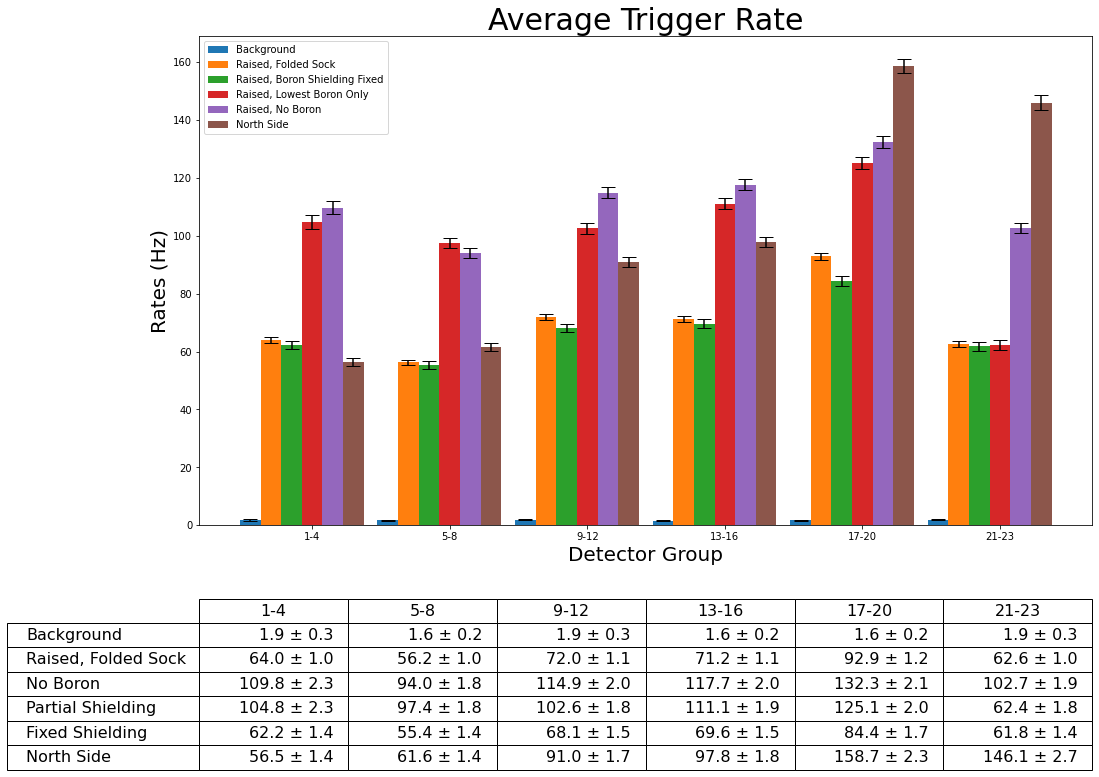

In [4]:
#Convert our data to a nice table.
table_text = []
for row in range(len(table_data)):
    errow = table_errors[row]
    datrow = table_data[row]
    table_text.append(["{:.1f} \u00B1 {:.1f}".format(datrow[i],errow[i]) for i in range(len(datrow))])

x_axis = np.arange(len(column_labels))
    
plt.figure(figsize=(16,9))

plt.bar(x_axis-0.15*3,table_data[0],0.15,label="Background")
plt.errorbar(x_axis-0.15*3,table_data[0],yerr=table_errors[0],color='black',fmt='none',capsize=7)
plt.bar(x_axis-0.15*2,table_data[1],0.15,label="Raised, Folded Sock")
plt.errorbar(x_axis-0.15*2,table_data[1],yerr=table_errors[1],color='black',fmt='none',capsize=7)
plt.bar(x_axis-0.15,table_data[4],0.15,label="Raised, Boron Shielding Fixed")
plt.errorbar(x_axis-0.15,table_data[4],yerr=table_errors[4],color='black',fmt='none',capsize=7)
plt.bar(x_axis,table_data[3],0.15,label="Raised, Lowest Boron Only")
plt.errorbar(x_axis,table_data[3],yerr=table_errors[3],color='black',fmt='none',capsize=7)
plt.bar(x_axis+0.15,table_data[2],0.15,label="Raised, No Boron")
plt.errorbar(x_axis+0.15,table_data[2],yerr=table_errors[2],color='black',fmt='none',capsize=7)
plt.bar(x_axis+0.15*2,table_data[5],0.15,label="North Side")
plt.errorbar(x_axis+0.15*2,table_data[5],yerr=table_errors[5],color='black',fmt='none',capsize=7)


table = plt.table(table_text,rowLabels=row_labels,colLabels=column_labels,bbox=[0,-0.5,1,0.35])

table.auto_set_font_size(False)
table.set_fontsize(16)
plt.xticks(x_axis,column_labels)
plt.xlabel("Detector Group",size=20)
plt.ylabel("Rates (Hz)",size=20)
plt.title("Average Trigger Rate",size=30)

plt.legend()
plt.show()

*Note: Lower threshold was 4337, and upper threshold was 142000.*

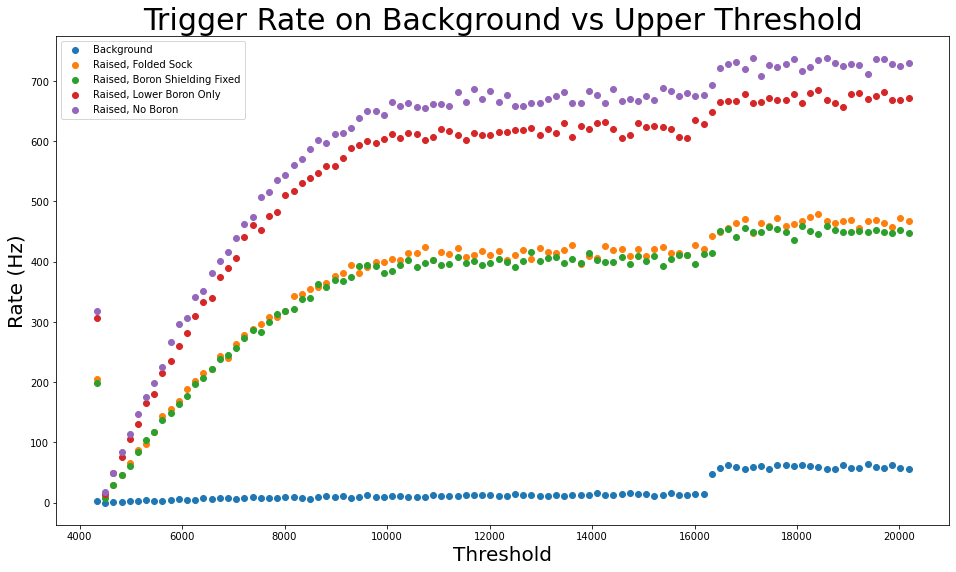

In [5]:
plt.figure(figsize=(16,9))

plt.scatter(threshold,rate_bg,label='Background')
plt.scatter(threshold,rate_raised,label='Raised, Folded Sock')
plt.scatter(threshold,rate_fixed,label='Raised, Boron Shielding Fixed')
plt.scatter(threshold,rate_partial,label='Raised, Lower Boron Only')
plt.scatter(threshold,rate_or,label='Raised, No Boron')
#plt.scatter(threshold_1,rate_bg,label='Background (First run)')
#plt.axhline(672,label="No Boron Raised Plateau",linestyle='dashed')
#plt.axvline(9750,label="Intersection; ~6.9MeV",linestyle='dashed')
#plt.axhline(0,color='grey')
#plt.axhline(742-672,color='grey')
#plt.axhline(742+742-672,color='grey')
#plt.axvline(10000,label="Raised intersection",linestyle='dashed',color='green')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Trigger Rate on Background vs Upper Threshold",size=30)
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.legend()
plt.show()

*Note: Lower threshold was 4337.*

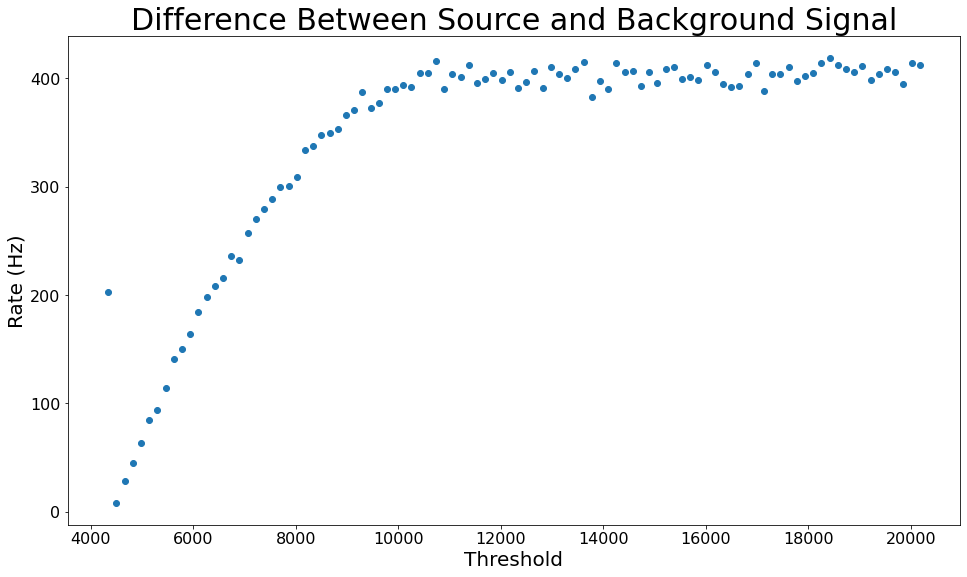

In [6]:
plt.figure(figsize=(16,9))

plt.scatter(threshold,rate_raised - rate_bg)

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Difference Between Source and Background Signal",size=30)
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.show()